# House Price Prediction

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Getting data from csv file
data = pd.read_csv('Housing.csv')

In [3]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [4]:
display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#check for null values
data[data.isnull().any(axis=1)].head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


No null values in data set

In [6]:
#Cleaning the data
cleaned_data = data.copy()

cleaned_data["mainroad"] = np.where(cleaned_data["mainroad"] == "no", 0, 1)
cleaned_data["guestroom"] = np.where(cleaned_data["guestroom"] == "no", 0, 1)
cleaned_data["basement"] = np.where(cleaned_data["basement"] == "no", 0, 1)
cleaned_data["hotwaterheating"] = np.where(cleaned_data["hotwaterheating"] == "no", 0, 1)
cleaned_data["airconditioning"] = np.where(cleaned_data["airconditioning"] == "no", 0, 1)
cleaned_data["prefarea"] = np.where(cleaned_data["prefarea"] == "no", 0, 1)
cleaned_data["furnishingstatus"] = np.where(cleaned_data["furnishingstatus"] == "unfurnished", 0, 1)
cleaned_data["price"] = ((round(cleaned_data["price"], -6)) / 1000000)
cleaned_data["price"] = cleaned_data["price"].astype(int)
cleaned_data["area"] = (round(cleaned_data["area"], -2) / 1000)
cleaned_data["area"] = cleaned_data["area"].astype(int)

display(cleaned_data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13,7,4,2,3,1,0,0,0,1,2,1,1
1,12,9,4,4,4,1,0,0,0,1,3,0,1
2,12,10,3,2,2,1,0,1,0,0,2,1,1
3,12,7,4,2,2,1,0,1,0,1,3,1,1
4,11,7,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,3,2,1,1,1,0,1,0,0,2,0,0
541,2,2,3,1,1,0,0,0,0,0,0,0,1
542,2,3,2,1,1,1,0,0,0,0,0,0,0
543,2,2,3,1,1,0,0,0,0,0,0,0,1


[Text(1, 0, 'Area'),
 Text(2, 0, 'Price'),
 Text(3, 0, 'Bedroom'),
 Text(4, 0, 'Bathroom')]

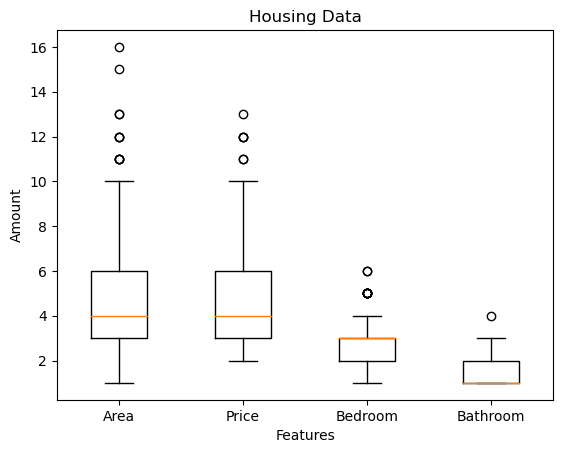

In [7]:
#Box Plot
data = [cleaned_data["area"], cleaned_data["price"], cleaned_data["bedrooms"], cleaned_data["bathrooms"]]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(data)
ax.set_title('Housing Data')
ax.set_xlabel('Features')
ax.set_ylabel('Amount')
ax.set_xticklabels(["Area", "Price", "Bedroom", "Bathroom"])

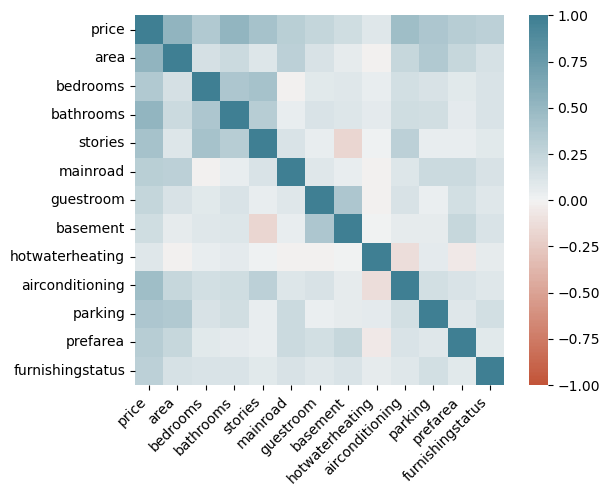

In [8]:
#Correlation Matrix
corr = cleaned_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
#Setting the target variable
y = cleaned_data[["price"]].copy()
y.head()

,price
0,13
1,12
2,12
3,12
4,11


In [10]:
#Setting independent variables minus target variable
house_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

x = cleaned_data[house_features].copy()
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [11]:
y.columns

Index(['price'], dtype='object')

# Training Model

In [12]:
#Getting training data and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 117)

In [13]:
#Setting decision tree model
housing_classifier = DecisionTreeClassifier(max_leaf_nodes=12, random_state = 0)
housing_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=12, random_state=0)

In [14]:
#Prediction based on test data
y_predicted = housing_classifier.predict(X_test)

In [15]:
#Scoring of prediction
accuracy_score(y_test, y_predicted)*100

38.53211009174312

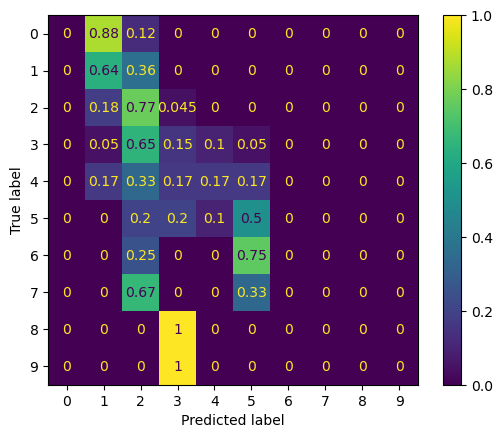

In [16]:
#Confusion Model
cm = confusion_matrix(y_test, y_predicted, normalize = 'true')
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [17]:
area = int(int(input("What is the area in square feet?")) / 1000)
bedrooms = int(input("How many bedrooms?"))
bathrooms = int(input("How many bathrooms?"))
stories = int(input("How many stories?"))
parking = int(input("How many parking spots?"))
mainroad = int(input("Is the house on a main road? 1 for Yes. 0 for No. "))
guestroom = int(input("Is there a guest room? 1 for Yes. 0 for No. "))
basement = int(input("Is there a basement? 1 for Yes. 0 for No. "))
hotwaterheating = int(input("Is there a hot water heater? 1 for Yes. 0 for No. "))
airconditioning = int(input("Is there an air conditioner? 1 for Yes. 0 for No. "))
prefarea = int(input("Is the house in a preffered area? 1 for Yes. 0 for No. "))
furnishingstatus = int(input("Is the house furnished 1 for Yes. 0 for No. "))


What is the area in square feet?5600
How many bedrooms?3
How many bathrooms?2
How many stories?2
How many parking spots?2
Is the house on a main road? 1 for Yes. 0 for No1
Is there a guest room? 1 for Yes. 0 for No1
Is there a basement? 1 for Yes. 0 for No1
Is there a hot water heater? 1 for Yes. 0 for No1
Is there an air conditioner? 1 for Yes. 0 for No1
Is the house in a preffered area? 1 for Yes. 0 for No1
Is the house furnished 1 for Yes. 0 for No1


In [18]:
print(area)
print(bedrooms)
print(bathrooms)
print(stories)
print(parking)
print(mainroad)
print(guestroom)
print(basement)
print(hotwaterheating)
print(airconditioning)
print(prefarea)
print(furnishingstatus)

5
3
2
2
2
1
1
1
1
1
1
1


In [19]:
entry_data = [{'area': area, 'bedrooms': bedrooms, 'bathrooms': bathrooms, 'stories': stories, 
              'mainroad': mainroad, 'guestroom': guestroom, 'basement': basement, 'hotwaterheating': hotwaterheating,
              'airconditioning': airconditioning, 'parking': parking, 'prefarea': prefarea, 
              'furnishingstatus': furnishingstatus}]
entry_df = pd.DataFrame.from_dict(entry_data)
entry_df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,5,3,2,2,1,1,1,1,1,2,1,1


In [20]:
entry_predicted = housing_classifier.predict(entry_df)
print("The house is worth an estimated:")
print('$' + str(entry_predicted[0] * 1000000))

The house is worth an estimated:
$5000000
